In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [12]:
#Load in all the images in the folder

images = glob.glob('./yellowlabels/image_*.png')

In [13]:

df = pd.read_csv('./HumanBrainstem_labels_lookup.txt',sep=' ',index_col=0,names=['Name','x','y','z','brightness'])

In [14]:
items_dict = {}
for index, row in df.iterrows():
    #print(row['Name'])
    items_dict[str([row['x'],row['y'],row['z']])] = row['Name']


In [15]:
print(images[7][-15:-4])

image_00007


In [16]:
for image in images:
    mat = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    blank_img = []
    #Iterate over pixels
    for i in range(0,454):
        mini_list = []
        for j in range(0,652):
            pixel = mat[i,j]
            try:
                mini_list.append(items_dict[str(list(pixel))])
            except:
                mini_list.append('Unknown Tissue')
        blank_img.append(mini_list)
        
    #Convert to df
    df2 = pd.DataFrame(blank_img)
    #Convert to json
    df2.to_json(image[-15:-4]+'.json')

In [24]:
for image in images[20:21]:
    print(image)
    mat = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    blank_img = []
    #Iterate over pixels
    for i in range(0,456):
        mini_list = []
        for j in range(0,652):
            pixel = mat[i,j]
            try:
                mini_list.append(items_dict[str(list(pixel))])
            except:
                mini_list.append('Unknown Tissue')
        blank_img.append(mini_list)
        
    #Convert to df
    df2 = pd.DataFrame(blank_img)
    #Convert to json
    df2.to_json(image[-15:-4]+'.json')

./redlabels/image_00020.png


In [11]:
#Turn it into a df
df2 = pd.DataFrame(blank_img)

In [16]:
df2.to_json('test.json')

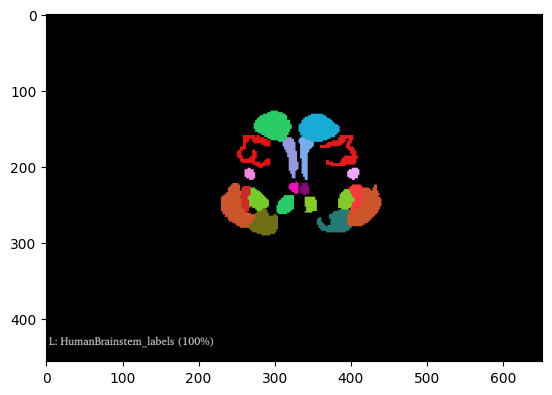

In [6]:
plt.imshow(cv2.cvtColor(cv2.imread(images[7]),cv2.COLOR_BGR2RGB))
plt.show()